writing a dataloader

In [17]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import os
import pandas as pd
import PIL


In [37]:
class COINDataset(Dataset):
    def __init__(self, img_dir):
        transform = ToTensor()
        self.image = transform(PIL.Image.open(img_dir))
        self.num_rows = self.image.shape[1]
        self.num_cols = self.image.shape[2]
        
    def __len__(self):
        return self.image[0].numel()

    def __getitem__(self, idx):
        
        row_idx = idx // self.num_cols
        col_idx = idx % self.num_rows
        
        return (row_idx, col_idx), self.image[:, row_idx, col_idx]

In [38]:
training_data = COINDataset(img_dir='images/kodim13.png')
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=1)

In [39]:
pixel_loc, labels = next(iter(train_dataloader))

print(pixel_loc, labels)

[tensor([0]), tensor([0])] tensor([[0.3882, 0.3882, 0.3882]])


100%|██████████| 393216/393216 [00:08<00:00, 45712.14it/s]


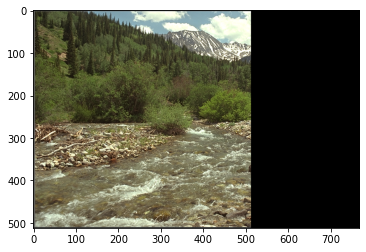

In [52]:
from tqdm import tqdm

def reconstruct_image():
    
    channels = 3
    num_rows = training_data.num_rows
    num_cols = training_data.num_cols
    
    reconstructed_image = torch.zeros((channels, num_rows, num_cols))
    
    for pixel_loc, rgb in tqdm(train_dataloader):
        reconstructed_image[:, pixel_loc[0], pixel_loc[1]] = rgb.T
        
    plt.imshow(reconstructed_image.permute(1,2,0))

reconstruct_image()

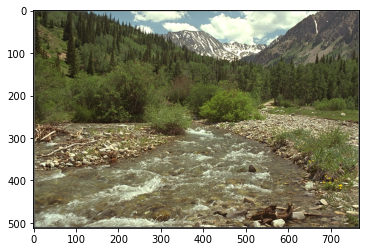

In [47]:
plt.imshow(training_data.image.permute(1,2,0))